In [1]:
#!pip install scikit-learn

In [2]:
import pandas as pd
import sklearn
import sklearn.model_selection
# from autoPyTorch.api.tabular_classification import TabularClassificationTask
#from autoPyTorch.api.tabular_regression import TabularRegressionTask
from matplotlib import pyplot as plt
import numpy as np
#from torch import nn, optim
#import torch
#import torch.nn.functional as F
import catboost

In [3]:
!ls ..

alignment_output_sample.json	      node_modules
dist				      package.json
dump_training_data.csv		      README.md
jupyter-notebooks		      src
map_with_catboost_stats.csv	      tsconfig.json
map_without_alignment.json	      tslint.json
map_without_alignment_stats.csv       WHITEPAPER.md
map_without_alignment_stats_save.csv  yarn.lock
netlify.toml


In [4]:
with open( "../dump_training_data.csv", 'r' ) as csv_in:
    data_string = csv_in.read()

In [5]:
# data_rows = data_string.split( '\n' )
# data_rows_cols = [data_row.split(",") for data_row in data_rows if len(data_row) > 0]
# data_rows_cols = [x[:len(data_rows_cols[0])] for x in data_rows_cols]
# data = pd.DataFrame(data_rows_cols[1:], columns=data_rows_cols[0])

In [16]:
data = pd.read_csv( "../dump_training_data.csv" )

In [21]:
y = data.output
X = data.loc[:,data.columns[5:]]
#y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    random_state=1,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [8]:
X_train.head()

,sourceCorpusPermutationsFrequencyRatio,targetCorpusPermutationsFrequencyRatio,sourceAlignmentMemoryFrequencyRatio,targetAlignmentMemoryFrequencyRatio,frequencyRatioCorpusFiltered,frequencyRatioAlignmentMemoryFiltered,sourceCorpusLemmaPermutationsFrequencyRatio,targetCorpusLemmaPermutationsFrequencyRatio,sourceAlignmentMemoryLemmaFrequencyRatio,targetAlignmentMemoryLemmaFrequencyRatio,...,alignmentRelativeOccurrence,alignmentPosition,phrasePlausibility,lemmaPhrasePlausibility,ngramLength,characterLength,alignmentOccurrences,lemmaAlignmentOccurrences,uniqueness,lemmaUniqueness
0,0.0002841716396703609,0.007407407407407408,0,0,1,0,0,0,0,0,...,1,0.7762162162162162,0.03331097454119154,0,0.9311294470254743,0.8835541061533794,1,0,0.0011096210248839112,0
1,0.000012477384740158463,0.05128205128205128,0,0,0.5,0,0,0,0,0,...,0,0.9663461538461539,0.0003712218559568151,0,0.7893043579878705,0.6264695847268171,0.5,0,1.378056663400224e-7,0
2,0.014925373134328358,0.00017032873445750298,0,0,0.5,0,0,0,0,0,...,0,0.5347593582887702,0.012829118128080469,0,0.9410546270911757,0.6031397304115246,0.5,0,0.0001645862719442429,0
3,0.0035949670461354103,0.004975124378109453,0,0,1,0,0,0,0,0,...,1,0.38749999999999996,0.7494969271768097,0,0.9817523154036901,0.8434503891905426,1,0,0.56174564384748,0
4,0.030456852791878174,0.00009592326139088728,0,0,0.5,0,0,0,0,0,...,0,0.5175,0.0024915560883667018,0,0.6955836064219412,0.71069051842373,0.5,0,0.00000620785174147718,0


In [9]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: output, dtype: object

In [10]:
from catboost import CatBoostRegressor, Pool

In [11]:
train_pool = Pool(
    data=X_train,
    label=y_train
)
validation_pool = Pool(
    data=X_test,
    label=y_test
)

In [12]:
model = CatBoostRegressor(
    iterations=2000,
    #task_type="GPU",
    learning_rate=.07
)
model.fit(train_pool, eval_set=validation_pool, verbose=True, plot=True)

print( 'Model is fitted: {}',format(model.is_fitted()))
print('Model params:\n{}'.format(model.get_params()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0541257	test: 0.0523640	best: 0.0523640 (0)	total: 93.7ms	remaining: 3m 7s
1:	learn: 0.0534112	test: 0.0516605	best: 0.0516605 (1)	total: 120ms	remaining: 1m 59s
2:	learn: 0.0527595	test: 0.0510154	best: 0.0510154 (2)	total: 149ms	remaining: 1m 38s
3:	learn: 0.0521780	test: 0.0505073	best: 0.0505073 (3)	total: 180ms	remaining: 1m 29s
4:	learn: 0.0512428	test: 0.0496406	best: 0.0496406 (4)	total: 202ms	remaining: 1m 20s
5:	learn: 0.0508088	test: 0.0492346	best: 0.0492346 (5)	total: 219ms	remaining: 1m 12s
6:	learn: 0.0503887	test: 0.0488641	best: 0.0488641 (6)	total: 236ms	remaining: 1m 7s
7:	learn: 0.0500502	test: 0.0485458	best: 0.0485458 (7)	total: 252ms	remaining: 1m 2s
8:	learn: 0.0493227	test: 0.0479376	best: 0.0479376 (8)	total: 269ms	remaining: 59.5s
9:	learn: 0.0486417	test: 0.0473683	best: 0.0473683 (9)	total: 286ms	remaining: 56.9s
10:	learn: 0.0481820	test: 0.0469070	best: 0.0469070 (10)	total: 312ms	remaining: 56.4s
11:	learn: 0.0476267	test: 0.0464186	best: 0.0

96:	learn: 0.0403055	test: 0.0401272	best: 0.0401272 (96)	total: 2.05s	remaining: 40.2s
97:	learn: 0.0402827	test: 0.0401041	best: 0.0401041 (97)	total: 2.06s	remaining: 40.1s
98:	learn: 0.0402700	test: 0.0401057	best: 0.0401041 (97)	total: 2.08s	remaining: 39.9s
99:	learn: 0.0402627	test: 0.0401030	best: 0.0401030 (99)	total: 2.09s	remaining: 39.8s
100:	learn: 0.0402299	test: 0.0400757	best: 0.0400757 (100)	total: 2.11s	remaining: 39.7s
101:	learn: 0.0402039	test: 0.0400625	best: 0.0400625 (101)	total: 2.13s	remaining: 39.6s
102:	learn: 0.0401726	test: 0.0400467	best: 0.0400467 (102)	total: 2.14s	remaining: 39.5s
103:	learn: 0.0401544	test: 0.0400493	best: 0.0400467 (102)	total: 2.16s	remaining: 39.4s
104:	learn: 0.0401406	test: 0.0400316	best: 0.0400316 (104)	total: 2.17s	remaining: 39.3s
105:	learn: 0.0401206	test: 0.0400158	best: 0.0400158 (105)	total: 2.21s	remaining: 39.4s
106:	learn: 0.0400622	test: 0.0399277	best: 0.0399277 (106)	total: 2.27s	remaining: 40.2s
107:	learn: 0.0400

192:	learn: 0.0387781	test: 0.0391726	best: 0.0391726 (192)	total: 4.2s	remaining: 39.3s
193:	learn: 0.0387699	test: 0.0391654	best: 0.0391654 (193)	total: 4.23s	remaining: 39.4s
194:	learn: 0.0387548	test: 0.0391610	best: 0.0391610 (194)	total: 4.25s	remaining: 39.3s
195:	learn: 0.0387411	test: 0.0391549	best: 0.0391549 (195)	total: 4.26s	remaining: 39.3s
196:	learn: 0.0387308	test: 0.0391537	best: 0.0391537 (196)	total: 4.28s	remaining: 39.2s
197:	learn: 0.0387236	test: 0.0391643	best: 0.0391537 (196)	total: 4.29s	remaining: 39.1s
198:	learn: 0.0387128	test: 0.0391560	best: 0.0391537 (196)	total: 4.31s	remaining: 39s
199:	learn: 0.0387064	test: 0.0391584	best: 0.0391537 (196)	total: 4.32s	remaining: 38.9s
200:	learn: 0.0386839	test: 0.0391438	best: 0.0391438 (200)	total: 4.34s	remaining: 38.8s
201:	learn: 0.0386760	test: 0.0391423	best: 0.0391423 (201)	total: 4.35s	remaining: 38.8s
202:	learn: 0.0386635	test: 0.0391394	best: 0.0391394 (202)	total: 4.37s	remaining: 38.7s
203:	learn: 0

292:	learn: 0.0378327	test: 0.0389747	best: 0.0389737 (288)	total: 6.42s	remaining: 37.4s
293:	learn: 0.0378205	test: 0.0389683	best: 0.0389683 (293)	total: 6.44s	remaining: 37.4s
294:	learn: 0.0378114	test: 0.0389691	best: 0.0389683 (293)	total: 6.46s	remaining: 37.3s
295:	learn: 0.0378060	test: 0.0389673	best: 0.0389673 (295)	total: 6.48s	remaining: 37.3s
296:	learn: 0.0378007	test: 0.0389662	best: 0.0389662 (296)	total: 6.49s	remaining: 37.2s
297:	learn: 0.0377985	test: 0.0389679	best: 0.0389662 (296)	total: 6.51s	remaining: 37.2s
298:	learn: 0.0377968	test: 0.0389679	best: 0.0389662 (296)	total: 6.54s	remaining: 37.2s
299:	learn: 0.0377900	test: 0.0389647	best: 0.0389647 (299)	total: 6.56s	remaining: 37.2s
300:	learn: 0.0377850	test: 0.0389654	best: 0.0389647 (299)	total: 6.58s	remaining: 37.1s
301:	learn: 0.0377735	test: 0.0389620	best: 0.0389620 (301)	total: 6.59s	remaining: 37.1s
302:	learn: 0.0377709	test: 0.0389615	best: 0.0389615 (302)	total: 6.61s	remaining: 37s
303:	learn: 

387:	learn: 0.0371829	test: 0.0388992	best: 0.0388984 (380)	total: 8.52s	remaining: 35.4s
388:	learn: 0.0371762	test: 0.0388967	best: 0.0388967 (388)	total: 8.55s	remaining: 35.4s
389:	learn: 0.0371630	test: 0.0388935	best: 0.0388935 (389)	total: 8.57s	remaining: 35.4s
390:	learn: 0.0371458	test: 0.0388759	best: 0.0388759 (390)	total: 8.59s	remaining: 35.3s
391:	learn: 0.0371371	test: 0.0388773	best: 0.0388759 (390)	total: 8.61s	remaining: 35.3s
392:	learn: 0.0371215	test: 0.0388561	best: 0.0388561 (392)	total: 8.63s	remaining: 35.3s
393:	learn: 0.0371197	test: 0.0388564	best: 0.0388561 (392)	total: 8.65s	remaining: 35.3s
394:	learn: 0.0371057	test: 0.0388491	best: 0.0388491 (394)	total: 8.67s	remaining: 35.2s
395:	learn: 0.0371045	test: 0.0388465	best: 0.0388465 (395)	total: 8.69s	remaining: 35.2s
396:	learn: 0.0370898	test: 0.0388384	best: 0.0388384 (396)	total: 8.71s	remaining: 35.2s
397:	learn: 0.0370705	test: 0.0388260	best: 0.0388260 (397)	total: 8.73s	remaining: 35.2s
398:	learn

484:	learn: 0.0364782	test: 0.0387267	best: 0.0387242 (478)	total: 10.9s	remaining: 33.9s
485:	learn: 0.0364774	test: 0.0387245	best: 0.0387242 (478)	total: 10.9s	remaining: 33.9s
486:	learn: 0.0364696	test: 0.0387268	best: 0.0387242 (478)	total: 10.9s	remaining: 33.9s
487:	learn: 0.0364659	test: 0.0387275	best: 0.0387242 (478)	total: 10.9s	remaining: 33.9s
488:	learn: 0.0364595	test: 0.0387282	best: 0.0387242 (478)	total: 11s	remaining: 33.9s
489:	learn: 0.0364388	test: 0.0387422	best: 0.0387242 (478)	total: 11s	remaining: 33.8s
490:	learn: 0.0364377	test: 0.0387422	best: 0.0387242 (478)	total: 11s	remaining: 33.8s
491:	learn: 0.0364267	test: 0.0387373	best: 0.0387242 (478)	total: 11s	remaining: 33.7s
492:	learn: 0.0364176	test: 0.0387406	best: 0.0387242 (478)	total: 11s	remaining: 33.7s
493:	learn: 0.0364091	test: 0.0387364	best: 0.0387242 (478)	total: 11s	remaining: 33.6s
494:	learn: 0.0364062	test: 0.0387374	best: 0.0387242 (478)	total: 11s	remaining: 33.6s
495:	learn: 0.0363896	te

576:	learn: 0.0359291	test: 0.0386815	best: 0.0386812 (572)	total: 12.8s	remaining: 31.6s
577:	learn: 0.0359268	test: 0.0386820	best: 0.0386812 (572)	total: 12.8s	remaining: 31.5s
578:	learn: 0.0359165	test: 0.0386818	best: 0.0386812 (572)	total: 12.8s	remaining: 31.5s
579:	learn: 0.0359049	test: 0.0386839	best: 0.0386812 (572)	total: 12.9s	remaining: 31.5s
580:	learn: 0.0358994	test: 0.0386836	best: 0.0386812 (572)	total: 12.9s	remaining: 31.5s
581:	learn: 0.0358910	test: 0.0386837	best: 0.0386812 (572)	total: 12.9s	remaining: 31.5s
582:	learn: 0.0358889	test: 0.0386843	best: 0.0386812 (572)	total: 12.9s	remaining: 31.5s
583:	learn: 0.0358868	test: 0.0386849	best: 0.0386812 (572)	total: 13s	remaining: 31.4s
584:	learn: 0.0358859	test: 0.0386848	best: 0.0386812 (572)	total: 13s	remaining: 31.4s
585:	learn: 0.0358843	test: 0.0386855	best: 0.0386812 (572)	total: 13s	remaining: 31.4s
586:	learn: 0.0358834	test: 0.0386854	best: 0.0386812 (572)	total: 13s	remaining: 31.3s
587:	learn: 0.0358

675:	learn: 0.0352532	test: 0.0385891	best: 0.0385830 (669)	total: 14.8s	remaining: 29s
676:	learn: 0.0352469	test: 0.0385902	best: 0.0385830 (669)	total: 14.8s	remaining: 28.9s
677:	learn: 0.0352459	test: 0.0385910	best: 0.0385830 (669)	total: 14.8s	remaining: 28.9s
678:	learn: 0.0352450	test: 0.0385917	best: 0.0385830 (669)	total: 14.9s	remaining: 28.9s
679:	learn: 0.0352436	test: 0.0385923	best: 0.0385830 (669)	total: 14.9s	remaining: 28.9s
680:	learn: 0.0352425	test: 0.0385934	best: 0.0385830 (669)	total: 14.9s	remaining: 28.9s
681:	learn: 0.0352309	test: 0.0385961	best: 0.0385830 (669)	total: 15s	remaining: 29.1s
682:	learn: 0.0352253	test: 0.0385910	best: 0.0385830 (669)	total: 15.1s	remaining: 29.1s
683:	learn: 0.0352204	test: 0.0385912	best: 0.0385830 (669)	total: 15.2s	remaining: 29.2s
684:	learn: 0.0352159	test: 0.0385916	best: 0.0385830 (669)	total: 15.2s	remaining: 29.2s
685:	learn: 0.0352103	test: 0.0385914	best: 0.0385830 (669)	total: 15.3s	remaining: 29.3s
686:	learn: 0.

777:	learn: 0.0347023	test: 0.0385582	best: 0.0385582 (777)	total: 17.2s	remaining: 27s
778:	learn: 0.0346952	test: 0.0385587	best: 0.0385582 (777)	total: 17.2s	remaining: 27s
779:	learn: 0.0346926	test: 0.0385585	best: 0.0385582 (777)	total: 17.2s	remaining: 26.9s
780:	learn: 0.0346905	test: 0.0385588	best: 0.0385582 (777)	total: 17.2s	remaining: 26.9s
781:	learn: 0.0346841	test: 0.0385604	best: 0.0385582 (777)	total: 17.2s	remaining: 26.9s
782:	learn: 0.0346759	test: 0.0385579	best: 0.0385579 (782)	total: 17.3s	remaining: 26.8s
783:	learn: 0.0346545	test: 0.0385575	best: 0.0385575 (783)	total: 17.3s	remaining: 26.8s
784:	learn: 0.0346348	test: 0.0385572	best: 0.0385572 (784)	total: 17.3s	remaining: 26.8s
785:	learn: 0.0346340	test: 0.0385572	best: 0.0385572 (784)	total: 17.3s	remaining: 26.8s
786:	learn: 0.0346224	test: 0.0385550	best: 0.0385550 (786)	total: 17.4s	remaining: 26.7s
787:	learn: 0.0346174	test: 0.0385544	best: 0.0385544 (787)	total: 17.4s	remaining: 26.7s
788:	learn: 0.

871:	learn: 0.0340478	test: 0.0384487	best: 0.0384484 (860)	total: 19.3s	remaining: 25s
872:	learn: 0.0340474	test: 0.0384499	best: 0.0384484 (860)	total: 19.4s	remaining: 25s
873:	learn: 0.0340453	test: 0.0384514	best: 0.0384484 (860)	total: 19.4s	remaining: 25s
874:	learn: 0.0340449	test: 0.0384525	best: 0.0384484 (860)	total: 19.4s	remaining: 25s
875:	learn: 0.0340420	test: 0.0384530	best: 0.0384484 (860)	total: 19.4s	remaining: 24.9s
876:	learn: 0.0340341	test: 0.0384537	best: 0.0384484 (860)	total: 19.5s	remaining: 24.9s
877:	learn: 0.0340294	test: 0.0384519	best: 0.0384484 (860)	total: 19.5s	remaining: 24.9s
878:	learn: 0.0340287	test: 0.0384520	best: 0.0384484 (860)	total: 19.5s	remaining: 24.9s
879:	learn: 0.0340256	test: 0.0384537	best: 0.0384484 (860)	total: 19.5s	remaining: 24.8s
880:	learn: 0.0340165	test: 0.0384522	best: 0.0384484 (860)	total: 19.6s	remaining: 24.8s
881:	learn: 0.0340153	test: 0.0384524	best: 0.0384484 (860)	total: 19.6s	remaining: 24.8s
882:	learn: 0.0340

963:	learn: 0.0336941	test: 0.0384313	best: 0.0384297 (961)	total: 22s	remaining: 23.6s
964:	learn: 0.0336919	test: 0.0384335	best: 0.0384297 (961)	total: 22s	remaining: 23.6s
965:	learn: 0.0336880	test: 0.0384336	best: 0.0384297 (961)	total: 22s	remaining: 23.6s
966:	learn: 0.0336808	test: 0.0384338	best: 0.0384297 (961)	total: 22.1s	remaining: 23.6s
967:	learn: 0.0336804	test: 0.0384339	best: 0.0384297 (961)	total: 22.1s	remaining: 23.5s
968:	learn: 0.0336799	test: 0.0384339	best: 0.0384297 (961)	total: 22.1s	remaining: 23.5s
969:	learn: 0.0336797	test: 0.0384339	best: 0.0384297 (961)	total: 22.1s	remaining: 23.5s
970:	learn: 0.0336784	test: 0.0384374	best: 0.0384297 (961)	total: 22.2s	remaining: 23.5s
971:	learn: 0.0336681	test: 0.0384386	best: 0.0384297 (961)	total: 22.2s	remaining: 23.5s
972:	learn: 0.0336621	test: 0.0384373	best: 0.0384297 (961)	total: 22.2s	remaining: 23.4s
973:	learn: 0.0336610	test: 0.0384404	best: 0.0384297 (961)	total: 22.2s	remaining: 23.4s
974:	learn: 0.03

1061:	learn: 0.0331842	test: 0.0384191	best: 0.0384050 (1025)	total: 24.8s	remaining: 21.9s
1062:	learn: 0.0331787	test: 0.0384198	best: 0.0384050 (1025)	total: 24.8s	remaining: 21.9s
1063:	learn: 0.0331679	test: 0.0384174	best: 0.0384050 (1025)	total: 24.8s	remaining: 21.8s
1064:	learn: 0.0331615	test: 0.0384153	best: 0.0384050 (1025)	total: 24.9s	remaining: 21.8s
1065:	learn: 0.0331570	test: 0.0384147	best: 0.0384050 (1025)	total: 24.9s	remaining: 21.8s
1066:	learn: 0.0331499	test: 0.0384169	best: 0.0384050 (1025)	total: 24.9s	remaining: 21.8s
1067:	learn: 0.0331431	test: 0.0384153	best: 0.0384050 (1025)	total: 24.9s	remaining: 21.8s
1068:	learn: 0.0331331	test: 0.0384131	best: 0.0384050 (1025)	total: 25s	remaining: 21.7s
1069:	learn: 0.0331194	test: 0.0384256	best: 0.0384050 (1025)	total: 25s	remaining: 21.7s
1070:	learn: 0.0331102	test: 0.0384236	best: 0.0384050 (1025)	total: 25.1s	remaining: 21.8s
1071:	learn: 0.0331050	test: 0.0384244	best: 0.0384050 (1025)	total: 25.1s	remaining

1157:	learn: 0.0326906	test: 0.0383647	best: 0.0383631 (1147)	total: 27s	remaining: 19.6s
1158:	learn: 0.0326890	test: 0.0383635	best: 0.0383631 (1147)	total: 27s	remaining: 19.6s
1159:	learn: 0.0326840	test: 0.0383643	best: 0.0383631 (1147)	total: 27s	remaining: 19.5s
1160:	learn: 0.0326833	test: 0.0383644	best: 0.0383631 (1147)	total: 27s	remaining: 19.5s
1161:	learn: 0.0326791	test: 0.0383677	best: 0.0383631 (1147)	total: 27.1s	remaining: 19.5s
1162:	learn: 0.0326747	test: 0.0383648	best: 0.0383631 (1147)	total: 27.1s	remaining: 19.5s
1163:	learn: 0.0326675	test: 0.0383685	best: 0.0383631 (1147)	total: 27.2s	remaining: 19.5s
1164:	learn: 0.0326624	test: 0.0383679	best: 0.0383631 (1147)	total: 27.2s	remaining: 19.5s
1165:	learn: 0.0326612	test: 0.0383687	best: 0.0383631 (1147)	total: 27.2s	remaining: 19.5s
1166:	learn: 0.0326517	test: 0.0383668	best: 0.0383631 (1147)	total: 27.2s	remaining: 19.4s
1167:	learn: 0.0326469	test: 0.0383666	best: 0.0383631 (1147)	total: 27.3s	remaining: 19

1248:	learn: 0.0322765	test: 0.0383527	best: 0.0383527 (1248)	total: 29.3s	remaining: 17.6s
1249:	learn: 0.0322741	test: 0.0383527	best: 0.0383527 (1248)	total: 29.3s	remaining: 17.6s
1250:	learn: 0.0322716	test: 0.0383553	best: 0.0383527 (1248)	total: 29.3s	remaining: 17.6s
1251:	learn: 0.0322650	test: 0.0383619	best: 0.0383527 (1248)	total: 29.4s	remaining: 17.5s
1252:	learn: 0.0322615	test: 0.0383631	best: 0.0383527 (1248)	total: 29.4s	remaining: 17.5s
1253:	learn: 0.0322573	test: 0.0383597	best: 0.0383527 (1248)	total: 29.4s	remaining: 17.5s
1254:	learn: 0.0322562	test: 0.0383605	best: 0.0383527 (1248)	total: 29.4s	remaining: 17.5s
1255:	learn: 0.0322527	test: 0.0383617	best: 0.0383527 (1248)	total: 29.4s	remaining: 17.4s
1256:	learn: 0.0322518	test: 0.0383614	best: 0.0383527 (1248)	total: 29.5s	remaining: 17.4s
1257:	learn: 0.0322512	test: 0.0383613	best: 0.0383527 (1248)	total: 29.5s	remaining: 17.4s
1258:	learn: 0.0322477	test: 0.0383619	best: 0.0383527 (1248)	total: 29.5s	remai

1340:	learn: 0.0319318	test: 0.0382907	best: 0.0382783 (1323)	total: 31.7s	remaining: 15.6s
1341:	learn: 0.0319295	test: 0.0382908	best: 0.0382783 (1323)	total: 31.7s	remaining: 15.5s
1342:	learn: 0.0319265	test: 0.0382913	best: 0.0382783 (1323)	total: 31.7s	remaining: 15.5s
1343:	learn: 0.0319246	test: 0.0382912	best: 0.0382783 (1323)	total: 31.8s	remaining: 15.5s
1344:	learn: 0.0319181	test: 0.0382926	best: 0.0382783 (1323)	total: 31.8s	remaining: 15.5s
1345:	learn: 0.0319106	test: 0.0382935	best: 0.0382783 (1323)	total: 31.8s	remaining: 15.5s
1346:	learn: 0.0319041	test: 0.0382945	best: 0.0382783 (1323)	total: 31.9s	remaining: 15.5s
1347:	learn: 0.0319034	test: 0.0382938	best: 0.0382783 (1323)	total: 31.9s	remaining: 15.4s
1348:	learn: 0.0319024	test: 0.0382924	best: 0.0382783 (1323)	total: 32s	remaining: 15.4s
1349:	learn: 0.0318912	test: 0.0382977	best: 0.0382783 (1323)	total: 32s	remaining: 15.4s
1350:	learn: 0.0318866	test: 0.0383018	best: 0.0382783 (1323)	total: 32.1s	remaining

1435:	learn: 0.0315460	test: 0.0382845	best: 0.0382783 (1323)	total: 34.4s	remaining: 13.5s
1436:	learn: 0.0315452	test: 0.0382825	best: 0.0382783 (1323)	total: 34.4s	remaining: 13.5s
1437:	learn: 0.0315449	test: 0.0382827	best: 0.0382783 (1323)	total: 34.4s	remaining: 13.5s
1438:	learn: 0.0315432	test: 0.0382827	best: 0.0382783 (1323)	total: 34.4s	remaining: 13.4s
1439:	learn: 0.0315347	test: 0.0382790	best: 0.0382783 (1323)	total: 34.5s	remaining: 13.4s
1440:	learn: 0.0315297	test: 0.0382733	best: 0.0382733 (1440)	total: 34.5s	remaining: 13.4s
1441:	learn: 0.0315197	test: 0.0382737	best: 0.0382733 (1440)	total: 34.5s	remaining: 13.4s
1442:	learn: 0.0315174	test: 0.0382735	best: 0.0382733 (1440)	total: 34.6s	remaining: 13.3s
1443:	learn: 0.0315052	test: 0.0382781	best: 0.0382733 (1440)	total: 34.6s	remaining: 13.3s
1444:	learn: 0.0315022	test: 0.0382784	best: 0.0382733 (1440)	total: 34.6s	remaining: 13.3s
1445:	learn: 0.0314955	test: 0.0382782	best: 0.0382733 (1440)	total: 34.7s	remai

1528:	learn: 0.0312007	test: 0.0382344	best: 0.0382344 (1528)	total: 37s	remaining: 11.4s
1529:	learn: 0.0311991	test: 0.0382355	best: 0.0382344 (1528)	total: 37s	remaining: 11.4s
1530:	learn: 0.0311948	test: 0.0382349	best: 0.0382344 (1528)	total: 37.1s	remaining: 11.3s
1531:	learn: 0.0311924	test: 0.0382350	best: 0.0382344 (1528)	total: 37.1s	remaining: 11.3s
1532:	learn: 0.0311884	test: 0.0382362	best: 0.0382344 (1528)	total: 37.1s	remaining: 11.3s
1533:	learn: 0.0311845	test: 0.0382359	best: 0.0382344 (1528)	total: 37.1s	remaining: 11.3s
1534:	learn: 0.0311815	test: 0.0382358	best: 0.0382344 (1528)	total: 37.1s	remaining: 11.2s
1535:	learn: 0.0311733	test: 0.0382366	best: 0.0382344 (1528)	total: 37.2s	remaining: 11.2s
1536:	learn: 0.0311690	test: 0.0382375	best: 0.0382344 (1528)	total: 37.2s	remaining: 11.2s
1537:	learn: 0.0311643	test: 0.0382378	best: 0.0382344 (1528)	total: 37.2s	remaining: 11.2s
1538:	learn: 0.0311619	test: 0.0382380	best: 0.0382344 (1528)	total: 37.2s	remaining

1621:	learn: 0.0308937	test: 0.0382314	best: 0.0382109 (1567)	total: 39.6s	remaining: 9.23s
1622:	learn: 0.0308926	test: 0.0382316	best: 0.0382109 (1567)	total: 39.6s	remaining: 9.21s
1623:	learn: 0.0308916	test: 0.0382318	best: 0.0382109 (1567)	total: 39.7s	remaining: 9.19s
1624:	learn: 0.0308903	test: 0.0382320	best: 0.0382109 (1567)	total: 39.7s	remaining: 9.16s
1625:	learn: 0.0308865	test: 0.0382317	best: 0.0382109 (1567)	total: 39.7s	remaining: 9.14s
1626:	learn: 0.0308835	test: 0.0382322	best: 0.0382109 (1567)	total: 39.7s	remaining: 9.11s
1627:	learn: 0.0308782	test: 0.0382321	best: 0.0382109 (1567)	total: 39.8s	remaining: 9.09s
1628:	learn: 0.0308749	test: 0.0382324	best: 0.0382109 (1567)	total: 39.8s	remaining: 9.06s
1629:	learn: 0.0308705	test: 0.0382324	best: 0.0382109 (1567)	total: 39.8s	remaining: 9.04s
1630:	learn: 0.0308643	test: 0.0382346	best: 0.0382109 (1567)	total: 39.8s	remaining: 9.01s
1631:	learn: 0.0308609	test: 0.0382332	best: 0.0382109 (1567)	total: 39.9s	remai

1712:	learn: 0.0305801	test: 0.0382256	best: 0.0382109 (1567)	total: 42.1s	remaining: 7.05s
1713:	learn: 0.0305661	test: 0.0382263	best: 0.0382109 (1567)	total: 42.1s	remaining: 7.03s
1714:	learn: 0.0305623	test: 0.0382266	best: 0.0382109 (1567)	total: 42.1s	remaining: 7s
1715:	learn: 0.0305563	test: 0.0382258	best: 0.0382109 (1567)	total: 42.2s	remaining: 6.98s
1716:	learn: 0.0305540	test: 0.0382272	best: 0.0382109 (1567)	total: 42.2s	remaining: 6.95s
1717:	learn: 0.0305482	test: 0.0382281	best: 0.0382109 (1567)	total: 42.2s	remaining: 6.93s
1718:	learn: 0.0305442	test: 0.0382285	best: 0.0382109 (1567)	total: 42.2s	remaining: 6.9s
1719:	learn: 0.0305394	test: 0.0382288	best: 0.0382109 (1567)	total: 42.2s	remaining: 6.88s
1720:	learn: 0.0305378	test: 0.0382284	best: 0.0382109 (1567)	total: 42.3s	remaining: 6.85s
1721:	learn: 0.0305363	test: 0.0382285	best: 0.0382109 (1567)	total: 42.3s	remaining: 6.83s
1722:	learn: 0.0305343	test: 0.0382282	best: 0.0382109 (1567)	total: 42.3s	remaining

1804:	learn: 0.0302334	test: 0.0382568	best: 0.0382109 (1567)	total: 44.6s	remaining: 4.82s
1805:	learn: 0.0302300	test: 0.0382566	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.8s
1806:	learn: 0.0302246	test: 0.0382575	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.77s
1807:	learn: 0.0302179	test: 0.0382605	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.75s
1808:	learn: 0.0302153	test: 0.0382605	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.72s
1809:	learn: 0.0302104	test: 0.0382609	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.7s
1810:	learn: 0.0302035	test: 0.0382630	best: 0.0382109 (1567)	total: 44.7s	remaining: 4.67s
1811:	learn: 0.0301989	test: 0.0382584	best: 0.0382109 (1567)	total: 44.8s	remaining: 4.64s
1812:	learn: 0.0301858	test: 0.0382599	best: 0.0382109 (1567)	total: 44.8s	remaining: 4.62s
1813:	learn: 0.0301816	test: 0.0382611	best: 0.0382109 (1567)	total: 44.8s	remaining: 4.59s
1814:	learn: 0.0301791	test: 0.0382613	best: 0.0382109 (1567)	total: 44.8s	remaini

1904:	learn: 0.0298007	test: 0.0382790	best: 0.0382109 (1567)	total: 47.1s	remaining: 2.35s
1905:	learn: 0.0297979	test: 0.0382781	best: 0.0382109 (1567)	total: 47.1s	remaining: 2.32s
1906:	learn: 0.0297964	test: 0.0382781	best: 0.0382109 (1567)	total: 47.1s	remaining: 2.3s
1907:	learn: 0.0297936	test: 0.0382786	best: 0.0382109 (1567)	total: 47.1s	remaining: 2.27s
1908:	learn: 0.0297902	test: 0.0382777	best: 0.0382109 (1567)	total: 47.2s	remaining: 2.25s
1909:	learn: 0.0297877	test: 0.0382788	best: 0.0382109 (1567)	total: 47.2s	remaining: 2.22s
1910:	learn: 0.0297839	test: 0.0382803	best: 0.0382109 (1567)	total: 47.2s	remaining: 2.2s
1911:	learn: 0.0297797	test: 0.0382813	best: 0.0382109 (1567)	total: 47.2s	remaining: 2.17s
1912:	learn: 0.0297647	test: 0.0382839	best: 0.0382109 (1567)	total: 47.2s	remaining: 2.15s
1913:	learn: 0.0297602	test: 0.0382809	best: 0.0382109 (1567)	total: 47.3s	remaining: 2.12s
1914:	learn: 0.0297586	test: 0.0382812	best: 0.0382109 (1567)	total: 47.3s	remaini

1995:	learn: 0.0294880	test: 0.0382821	best: 0.0382109 (1567)	total: 49.2s	remaining: 98.6ms
1996:	learn: 0.0294864	test: 0.0382824	best: 0.0382109 (1567)	total: 49.2s	remaining: 74ms
1997:	learn: 0.0294857	test: 0.0382824	best: 0.0382109 (1567)	total: 49.3s	remaining: 49.3ms
1998:	learn: 0.0294823	test: 0.0382822	best: 0.0382109 (1567)	total: 49.3s	remaining: 24.6ms
1999:	learn: 0.0294764	test: 0.0382847	best: 0.0382109 (1567)	total: 49.3s	remaining: 0us

bestTest = 0.03821090731
bestIteration = 1567

Shrink model to first 1568 iterations.
Model is fitted: {} True
Model params:
{'iterations': 2000, 'learning_rate': 0.07, 'loss_function': 'RMSE'}


In [13]:
X.head()

,sourceCorpusPermutationsFrequencyRatio,targetCorpusPermutationsFrequencyRatio,sourceAlignmentMemoryFrequencyRatio,targetAlignmentMemoryFrequencyRatio,frequencyRatioCorpusFiltered,frequencyRatioAlignmentMemoryFiltered,sourceCorpusLemmaPermutationsFrequencyRatio,targetCorpusLemmaPermutationsFrequencyRatio,sourceAlignmentMemoryLemmaFrequencyRatio,targetAlignmentMemoryLemmaFrequencyRatio,...,alignmentRelativeOccurrence,alignmentPosition,phrasePlausibility,lemmaPhrasePlausibility,ngramLength,characterLength,alignmentOccurrences,lemmaAlignmentOccurrences,uniqueness,lemmaUniqueness
0,0.029411764705882353,0.023809523809523808,0,0,1,0,0,0,0,0,...,1,0.36363636363636365,0.7494969271768096,0,0.3632654951131687,0.78551832503512,1,0,0.5617456438474798,0
1,0.02730599093441101,0.007993605115907274,0,0,0.1111111111111111,0,0,0,0,0,...,0.5,0.33620129870129867,0.33137695975277126,0,0.9193985326646094,0.9430490720128795,1,0,0.10981068945498978,0
2,0.00016383594560646605,0.07142857142857142,0,0,0.3333333333333333,0,0,0,0,0,...,0,0.7987012987012987,0.00281765762096545,0,0.5904900000000001,0.5492908853958084,0.3333333333333333,0,0.00000793919446898468,0
3,0.00016383594560646605,0.07142857142857142,0,0,0.3333333333333333,0,0,0,0,0,...,0,0.8896103896103896,0.00281765762096545,0,0.3632654951131687,0.3793736319035358,0.3333333333333333,0,0.00000793919446898468,0
4,0.007228915662650603,0.07142857142857142,0,0,0.16666666666666666,0,0,0,0,0,...,1,0.8701298701298701,0.13627216857760177,0,0.9193985326646094,0.8932789260673025,0.6666666666666666,0,0.018570103928842317,0


In [22]:
y_pred_ = model.predict(X)
y_     = y

In [23]:
y_[0]

0

<IPython.core.display.Javascript object>


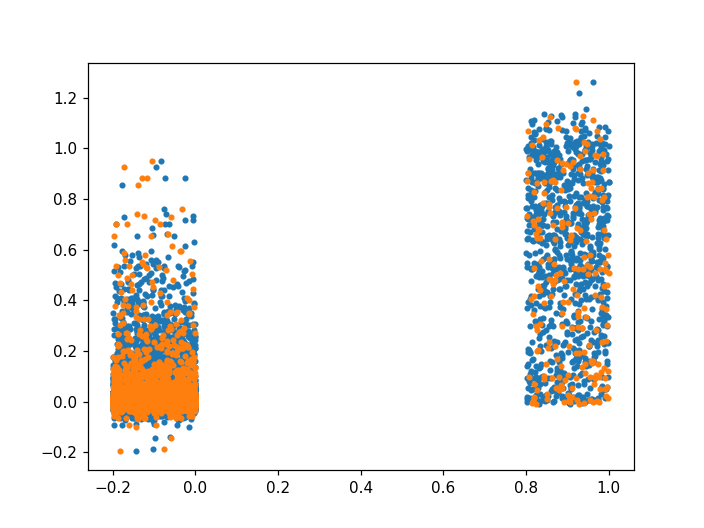

In [24]:
%matplotlib notebook
import random
y_shuff = [x+(random.random()*.2-.2) for x in y_]
plt.plot(y_shuff,y_pred_,'.')

In [25]:
y_pred_test = model.predict(X_test)
y_test_     = y_test

y_shuff_test = [x+(random.random()*.2-.2) for x in y_test_]
plt.plot(y_shuff_test,y_pred_test,'.')

In [33]:
#Pick out indexes of false positives.  Where the label y_ is false but the prediction y_pred_ is true.
#data[:,fishy_index[0][0]]
fishy_index = np.where((y_<.4)&(y_pred_>.5))
data.loc[fishy_index[0][2],:]

output                                                0
source                                             n:σύ
target                                            n:you
sLang                                              na27
tLang                                               ylt
sourceCorpusPermutationsFrequencyRatio         0.009003
targetCorpusPermutationsFrequencyRatio         0.031099
sourceAlignmentMemoryFrequencyRatio                   0
targetAlignmentMemoryFrequencyRatio                   0
frequencyRatioCorpusFiltered                        1.0
frequencyRatioAlignmentMemoryFiltered                 0
sourceCorpusLemmaPermutationsFrequencyRatio         0.0
targetCorpusLemmaPermutationsFrequencyRatio         0.0
sourceAlignmentMemoryLemmaFrequencyRatio              0
targetAlignmentMemoryLemmaFrequencyRatio              0
lemmaFrequencyRatioCorpusFiltered                   0.0
lemmaFrequencyRatioAlignmentMemoryFiltered            0
ngramRelativeTokenDistance                      

In [30]:
fishy_index

(array([ 10273,  23509,  33687,  36810,  37890,  38701,  46249,  46486,
         50411,  51609,  61096,  61141,  61189,  64727,  68490,  68526,
         88001,  88132,  94974, 102245, 104327, 111719, 113428, 139372,
        149254, 149340, 154893, 165523, 168872, 170429, 180892, 185203,
        192477, 198962, 198968, 199565, 202244, 203695, 215913, 215934,
        217059, 218561, 230985, 236512, 242921, 252944, 264137, 281249,
        289320, 290861, 292611, 294532, 300240, 301768, 302663]),)

In [ ]:
data.loc[fishy_index[0],["source","target"]]

In [35]:
#This shows the false negatives where the labels said true but the model said false.
fishy_low = np.where((y_>.4)&(y_pred_<.001))
#print(fishy_low[0][2])
data.loc[fishy_low[0][0],:]

output                                                1
source                                         n:μηδείς
target                                         n:no:one
sLang                                              na27
tLang                                               ylt
sourceCorpusPermutationsFrequencyRatio         0.007452
targetCorpusPermutationsFrequencyRatio         0.011574
sourceAlignmentMemoryFrequencyRatio                   0
targetAlignmentMemoryFrequencyRatio                   0
frequencyRatioCorpusFiltered                        1.0
frequencyRatioAlignmentMemoryFiltered                 0
sourceCorpusLemmaPermutationsFrequencyRatio         0.0
targetCorpusLemmaPermutationsFrequencyRatio         0.0
sourceAlignmentMemoryLemmaFrequencyRatio              0
targetAlignmentMemoryLemmaFrequencyRatio              0
lemmaFrequencyRatioCorpusFiltered                   0.0
lemmaFrequencyRatioAlignmentMemoryFiltered            0
ngramRelativeTokenDistance                      

In [36]:
model.save_model( "../tenth_of_nt.cbm" )

In [ ]:
model.save_model( "../catboost_save.cpp", format="cpp" )
model.save_model( "../catboost_save.py", format="python" )